In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
train_df = pd.read_csv('./datasets/KOSDAQ+KOSPI_TRAIN_DATA.csv', index_col=0)
train_df = train_df.iloc[:,3:]

In [3]:
X_train = train_df.drop(columns=['label', '산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기'], axis=1)
X_train_concat = train_df[['산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기']]
y_train = train_df[['label']]

In [4]:
test_df = pd.read_csv('./datasets/KOSDAQ+KOSPI_TEST1_DATA.csv', index_col=0)
test_df = test_df.iloc[:,3:]

In [5]:
X_test = test_df.drop(columns=['label', '산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기'], axis=1)
X_test_concat = test_df[['산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기']]
y_test = test_df[['label']]

In [6]:
from sklearn.preprocessing import StandardScaler
# StandardScaler() Scaler객체 생성.
scaler = StandardScaler()
# 학습 데이터에 대해서 fit(), transform() 수행.
scaler.fit(X_train)
train_scaled_SS = scaler.transform(X_train)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_SS = pd.DataFrame(data = train_scaled_SS, columns=X_train.columns)

# 테스트 데이터에서는 다시 fit(), transform()이나 fit_transform()을 수행하지 않고 transform만 수행.
test_scaled_SS = scaler.transform(X_test)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_SS = pd.DataFrame(data = test_scaled_SS, columns=X_test.columns)

In [7]:
X_train_SS = pd.concat([X_train_SS, X_train_concat], axis=1)
X_test_SS = pd.concat([X_test_SS, X_test_concat], axis=1)

In [8]:
df_EDA = pd.concat([X_train_SS, X_test_SS], axis=0, ignore_index=True)
df_EDA

,총자본증가율,유형자산증가율,유동자산증가율,비유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,매출총이익증가율,당기순이익증가율,정상영업손익증가율,...,재무활동현금흐름,현금및현금성자산의증가,경영기간,상장기간,산업분류,기업생애주기_Shake-Out,기업생애주기_도입기,기업생애주기_성숙기,기업생애주기_성장기,기업생애주기_쇠퇴기
0,-0.779220,-0.315446,-0.518500,-0.615443,-0.252074,-0.729362,-0.553146,1.030114,0.142067,0.202132,...,-0.491739,-0.665275,1.745979,1.887971,1,0,0,1,0,0
1,-0.437921,-0.339430,-0.009534,-0.466532,-0.168766,-0.381360,-0.057767,-0.120683,0.167883,0.148499,...,-0.151184,-0.057214,1.805370,1.976681,1,0,0,1,0,0
2,-0.617846,-0.306218,-0.958214,-0.323806,-0.326425,-0.872637,-0.704755,-0.214067,-0.144695,0.093751,...,-0.127325,-0.110206,1.864760,2.065391,1,0,0,1,0,0
3,-0.560549,-0.302978,0.003463,-0.560835,-0.267788,-1.106441,0.163223,0.217442,0.086403,1.251840,...,-0.027847,0.003471,1.924151,2.154101,1,0,0,0,1,0
4,-0.318185,-0.342414,0.630556,-0.572816,0.076614,1.990540,0.230555,0.318817,0.431606,0.387441,...,-0.404051,0.726711,1.983542,2.242811,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,-0.093361,0.189880,-0.291621,0.393134,-0.088758,-0.379238,-0.395897,-0.109146,0.017980,0.043445,...,-0.020258,-0.031099,-1.401724,-0.862040,1,0,0,0,1,0
14727,0.097778,-0.172892,-0.249705,1.222516,0.351121,-0.077108,-0.246149,-0.212421,0.067257,-0.077983,...,-0.217751,-0.082197,-0.689037,-1.039460,1,0,0,1,0,0
14728,-0.407249,-0.008979,-0.427773,-0.085294,0.235905,-0.372959,0.085229,-0.091737,0.031643,0.038898,...,-0.499477,-0.214343,-0.629646,-0.950750,1,0,0,1,0,0
14729,-0.523544,-0.214850,-0.792968,-0.336388,-0.840359,-0.247296,-0.060810,-0.120623,0.096464,0.108733,...,-0.072487,-0.027923,1.389635,0.823451,0,1,0,0,0,0


## 정규성검정 (X_train+X_tset)
1. 샤피로 테스트

In [9]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(df_EDA):
    Shapi = []
    Shapi.append([col for col in df_EDA])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(df_EDA[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(df_EDA.iloc[:,:])

총자본증가율 Test-statistics : 0.7055023908615112, p-value : 0.0
유형자산증가율 Test-statistics : 0.3970165252685547, p-value : 0.0
유동자산증가율 Test-statistics : 0.7228143215179443, p-value : 0.0
비유동자산증가율 Test-statistics : 0.5907121896743774, p-value : 0.0
재고자산증가율 Test-statistics : 0.5328930616378784, p-value : 0.0
자기자본증가율 Test-statistics : 0.5319395065307617, p-value : 0.0
매출액증가율 Test-statistics : 0.7169000506401062, p-value : 0.0
매출총이익증가율 Test-statistics : 0.427007794380188, p-value : 0.0
당기순이익증가율 Test-statistics : 0.36431217193603516, p-value : 0.0
정상영업손익증가율 Test-statistics : 0.44870370626449585, p-value : 0.0
매출액총이익률 Test-statistics : 0.9201313853263855, p-value : 0.0
매출액순이익률 Test-statistics : 0.306567907333374, p-value : 0.0
총자본순이익률 Test-statistics : 0.8033860325813293, p-value : 0.0
자기자본순이익률 Test-statistics : 0.6723889112472534, p-value : 0.0
매출원가대매출액비율 Test-statistics : 0.8355889320373535, p-value : 0.0
영업비용대영업수익비율 Test-statistics : 0.36763298511505127, p-value : 0.0
기업순이익률 Test-statistics : 0.7

## 앤더슨

In [10]:
# 엔달슨 - 달링
from scipy import stats
from scipy.stats import anderson

def Anderson(df_EDA):
    ander = []
    ander.append([col for col in df_EDA])
    for i in ander:
        for j in i:
            anderson_test = anderson(df_EDA[j], dist='norm')
            print(j,anderson_test)

Anderson(df_EDA)

총자본증가율 AndersonResult(statistic=1120.35041165636, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.030825170428870077, scale=1.0586588251325006)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
유형자산증가율 AndersonResult(statistic=2624.9923751645256, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.02726428508785101, scale=1.0679608015431201)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
유동자산증가율 AndersonResult(statistic=973.2070455863868, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.019167264832454504, scale=1.0512115828716941)
 success: True
 message: '`anderson` successfully fit the distribution 

정규성검정 만족하는 컬럼 확인

In [11]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [12]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',X_train_SS)
normal_s

,normal


In [13]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',X_train_SS)
normal_a

,normal


In [14]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',X_train_SS)
normal_ks

,normal
0,유동자산구성비율
1,비유동자산구성비율


In [15]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',X_train_SS)
normal_jb

,normal


In [16]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',X_train_SS)
normal_n

,normal


## 1. 등분산 검정

In [17]:
df_등분산 = pd.concat([X_train_SS, y_train], axis=1)

df_등분산_1 = df_등분산.drop(columns=['label', '산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기'], axis=1)

In [18]:
df_등분산_1

,총자본증가율,유형자산증가율,유동자산증가율,비유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,매출총이익증가율,당기순이익증가율,정상영업손익증가율,...,재고자산회전률,매출채권회전률,유형자산회전율,순운전자본회전률,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,현금및현금성자산의증가,경영기간,상장기간
0,-0.779220,-0.315446,-0.518500,-0.615443,-0.252074,-0.729362,-0.553146,1.030114,0.142067,0.202132,...,-0.193638,-0.248052,-0.368051,-0.795335,-0.032912,0.120458,-0.491739,-0.665275,1.745979,1.887971
1,-0.437921,-0.339430,-0.009534,-0.466532,-0.168766,-0.381360,-0.057767,-0.120683,0.167883,0.148499,...,-0.191998,0.016720,-0.362953,-0.995163,-0.003212,0.063810,-0.151184,-0.057214,1.805370,1.976681
2,-0.617846,-0.306218,-0.958214,-0.323806,-0.326425,-0.872637,-0.704755,-0.214067,-0.144695,0.093751,...,-0.195308,-0.029210,-0.365927,-0.958830,-0.106141,0.139954,-0.127325,-0.110206,1.864760,2.065391
3,-0.560549,-0.302978,0.003463,-0.560835,-0.267788,-1.106441,0.163223,0.217442,0.086403,1.251840,...,-0.190548,0.014018,-0.358704,-0.541008,-0.061579,0.076127,-0.027847,0.003471,1.924151,2.154101
4,-0.318185,-0.342414,0.630556,-0.572816,0.076614,1.990540,0.230555,0.318817,0.431606,0.387441,...,-0.188310,-0.038666,-0.347233,-0.086854,0.175166,0.144798,-0.404051,0.726711,1.983542,2.242811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10926,-0.483232,-0.215691,-0.787696,-0.298043,-0.157657,-0.252184,-0.497117,-0.182616,0.010358,-0.267138,...,-0.002967,2.858967,-0.161149,3.455550,-0.161268,0.171123,-0.054381,-0.056994,1.092682,0.379901
10927,-0.416596,-0.328051,0.541423,-0.527550,-0.789655,-0.221824,-0.866079,-0.163937,0.271998,1.423302,...,-0.009462,3.165617,-0.204909,3.455550,-0.160700,0.180074,-0.056882,-0.012399,1.152073,0.468611
10928,0.133818,-0.219947,-0.663617,0.220399,-0.529305,-0.203793,-0.795987,-0.228228,0.162414,-0.119716,...,0.040854,2.907599,-0.235073,3.455550,-0.160160,0.146383,-0.008076,-0.078374,1.211463,0.557321
10929,-0.268777,-0.285025,-0.087570,-0.285159,0.514191,-0.238967,-0.451572,-0.123219,0.042180,0.245508,...,0.001573,2.940020,-0.241871,3.455550,-0.167825,0.166458,-0.033584,-0.068545,1.270854,0.646031


## MDA

In [19]:
Bad = df_등분산[df_등분산['label']== 1] #Existing Customer
Good = df_등분산[df_등분산['label']== 0] #Attrited Customer

In [20]:
df_등분산

,총자본증가율,유형자산증가율,유동자산증가율,비유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,매출총이익증가율,당기순이익증가율,정상영업손익증가율,...,현금및현금성자산의증가,경영기간,상장기간,산업분류,기업생애주기_Shake-Out,기업생애주기_도입기,기업생애주기_성숙기,기업생애주기_성장기,기업생애주기_쇠퇴기,label
0,-0.779220,-0.315446,-0.518500,-0.615443,-0.252074,-0.729362,-0.553146,1.030114,0.142067,0.202132,...,-0.665275,1.745979,1.887971,1,0,0,1,0,0,0
1,-0.437921,-0.339430,-0.009534,-0.466532,-0.168766,-0.381360,-0.057767,-0.120683,0.167883,0.148499,...,-0.057214,1.805370,1.976681,1,0,0,1,0,0,0
2,-0.617846,-0.306218,-0.958214,-0.323806,-0.326425,-0.872637,-0.704755,-0.214067,-0.144695,0.093751,...,-0.110206,1.864760,2.065391,1,0,0,1,0,0,0
3,-0.560549,-0.302978,0.003463,-0.560835,-0.267788,-1.106441,0.163223,0.217442,0.086403,1.251840,...,0.003471,1.924151,2.154101,1,0,0,0,1,0,0
4,-0.318185,-0.342414,0.630556,-0.572816,0.076614,1.990540,0.230555,0.318817,0.431606,0.387441,...,0.726711,1.983542,2.242811,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10926,-0.483232,-0.215691,-0.787696,-0.298043,-0.157657,-0.252184,-0.497117,-0.182616,0.010358,-0.267138,...,-0.056994,1.092682,0.379901,0,0,0,1,0,0,0
10927,-0.416596,-0.328051,0.541423,-0.527550,-0.789655,-0.221824,-0.866079,-0.163937,0.271998,1.423302,...,-0.012399,1.152073,0.468611,0,1,0,0,0,0,0
10928,0.133818,-0.219947,-0.663617,0.220399,-0.529305,-0.203793,-0.795987,-0.228228,0.162414,-0.119716,...,-0.078374,1.211463,0.557321,0,0,0,0,1,0,0
10929,-0.268777,-0.285025,-0.087570,-0.285159,0.514191,-0.238967,-0.451572,-0.123219,0.042180,0.245508,...,-0.068545,1.270854,0.646031,0,0,0,0,1,0,0


In [21]:
a = []
for i in df_등분산_1:
    lresult = stats.bartlett(Bad[i], Good[i])
    a.append([i,lresult[-1]])

In [22]:
pd.options.display.float_format = '{:.10f}'.format

In [23]:
a= pd.DataFrame(a)
a.columns=["피처값",'F-test']
a

,피처값,F-test
0,총자본증가율,0.0000000286
1,유형자산증가율,0.0000256482
2,유동자산증가율,0.0000000286
3,비유동자산증가율,0.0000000000
4,재고자산증가율,0.2325449990
5,자기자본증가율,0.0000000000
6,매출액증가율,0.0000000000
7,매출총이익증가율,0.0000000000
8,당기순이익증가율,0.0000000000
9,정상영업손익증가율,0.0010856718


In [24]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
    else:
        a.loc[i,"분산"] = "hetero"
a

,피처값,F-test,분산,T-test
0,총자본증가율,0.0000000286,hetero,
1,유형자산증가율,0.0000256482,hetero,
2,유동자산증가율,0.0000000286,hetero,
3,비유동자산증가율,0.0000000000,hetero,
4,재고자산증가율,0.2325449990,homo,
5,자기자본증가율,0.0000000000,hetero,
6,매출액증가율,0.0000000000,hetero,
7,매출총이익증가율,0.0000000000,hetero,
8,당기순이익증가율,0.0000000000,hetero,
9,정상영업손익증가율,0.0010856718,hetero,


In [25]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
        result = stats.ttest_ind(Bad[a.loc[i,"피처값"]], Good[a.loc[i,"피처값"]], equal_var=True)       ## equal_var = True Student T-test
        a.loc[i,"T-test"] = result[-1]
    else:
        a.loc[i,"분산"] = "hetero"
        result = stats.ttest_ind(Bad[a.loc[i,"피처값"]], Good[a.loc[i,"피처값"]], equal_var=False)      ## equal_var = False Welchs T-Test
        a.loc[i,"T-test"] = result[-1]
a

,피처값,F-test,분산,T-test
0,총자본증가율,0.0000000286,hetero,0.0000000000
1,유형자산증가율,0.0000256482,hetero,0.0199899944
2,유동자산증가율,0.0000000286,hetero,0.0000000118
3,비유동자산증가율,0.0000000000,hetero,0.0000631823
4,재고자산증가율,0.2325449990,homo,0.0000002354
5,자기자본증가율,0.0000000000,hetero,0.0000048619
6,매출액증가율,0.0000000000,hetero,0.0000314543
7,매출총이익증가율,0.0000000000,hetero,0.0032870203
8,당기순이익증가율,0.0000000000,hetero,0.0005374129
9,정상영업손익증가율,0.0010856718,hetero,0.0000644369


In [26]:
a.sort_values('T-test').head(20)['피처값'].tolist()

['1주당매출액',
 '타인자본회전률',
 '총자본순이익률',
 '순운전자본회전률',
 '기업순이익률',
 '투자활동현금흐름',
 '1주당정상영업이익',
 '자기자본순이익률',
 '매입채무회전률',
 'CASHFLOW대부채비율',
 '순운전자본비율',
 '자기자본구성비율',
 '타인자본구성비율',
 'CASHFLOW대총자본비율',
 '이자부담률',
 '영업활동현금흐름',
 '총자본회전률',
 '매출원가대매출액비율',
 '금융비용대총비용비율',
 '총자본증가율']

In [27]:
df_MDA = df_등분산[['1주당매출액',
 '타인자본회전률',
 '총자본순이익률',
 '순운전자본회전률',
 '기업순이익률',
 '투자활동현금흐름',
 '1주당정상영업이익',
 '자기자본순이익률',
 '매입채무회전률',
 'CASHFLOW대부채비율',
 '순운전자본비율',
 '자기자본구성비율',
 '타인자본구성비율',
 'CASHFLOW대총자본비율',
 '이자부담률',
 '영업활동현금흐름',
 '총자본회전률',
 '매출원가대매출액비율',
 '금융비용대총비용비율',
 '총자본증가율']]

In [28]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_MDA)

,VIF Factor,features
0,1179.2979266331,타인자본구성비율
1,1168.2420945015,자기자본구성비율
2,364.0156657511,총자본순이익률
3,332.3256263224,기업순이익률
4,6.7011676671,타인자본회전률
5,6.4131448086,총자본회전률
6,5.3261287906,영업활동현금흐름
7,5.3231921750,투자활동현금흐름
8,4.9974528766,순운전자본회전률
9,4.9707380908,이자부담률


In [29]:
MDA = list(vif(df_MDA)["features"])

## 2. Logit

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()

feature = df_등분산.drop(columns='label')
target = df_등분산[['label']]

logit = SelectFromModel(LogisticRegression())
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()

In [32]:
lr_feature

['유동자산증가율',
 '매출액총이익률',
 '총자본순이익률',
 '매출원가대매출액비율',
 '기업순이익률',
 '1주당매출액',
 '1주당순이익',
 '1주당CASHFLOW',
 '1주당정상영업이익',
 '유동자산구성비율',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '비유동비율',
 '당좌비율',
 '현금비율',
 '부채비율',
 '순운전자본비율',
 'CASHFLOW대차입금비율',
 '총자본회전률',
 '매입채무회전률',
 '산업분류',
 '기업생애주기_도입기']

In [39]:
lr_feature = df_등분산[['유동자산증가율',
 '매출액총이익률',
 '총자본순이익률',
 '매출원가대매출액비율',
 '1주당매출액',
 '1주당순이익',
 '1주당CASHFLOW',
 '1주당정상영업이익',
 '유동자산구성비율',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '당좌비율',
 '현금비율',
 '부채비율',
 '순운전자본비율',
 'CASHFLOW대차입금비율',
 '총자본회전률',
 '매입채무회전률',
 '산업분류',
 '기업생애주기_도입기']]

In [40]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(lr_feature)

,VIF Factor,features
0,10.1377552103,순운전자본비율
1,7.3194827904,자기자본구성비율
2,5.6635254813,1주당정상영업이익
3,4.9194159230,유동자산구성비율
4,3.6533796660,1주당CASHFLOW
5,3.4588850173,당좌비율
6,3.1408428858,1주당매출액
7,2.7411835360,1주당순이익
8,2.7368153193,부채비율
9,2.5465892275,현금비율


In [41]:
Logit = list(vif(lr_feature)["features"])

## 3. Embbeded Method

Lasso

In [42]:
lasso_best = LogisticRegression(C=0.07,penalty='l1',solver='liblinear').fit(X_train_SS, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train_SS.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,총자본증가율,-0.0242111253
1,유형자산증가율,-0.0235513839
2,유동자산증가율,-0.1143500635
6,매출액증가율,-0.0054804217
9,정상영업손익증가율,0.0228151320
12,총자본순이익률,-0.5277867769
13,자기자본순이익률,-0.0866434728
14,매출원가대매출액비율,0.0725859560
15,영업비용대영업수익비율,0.0852495979
17,금융비용대총비용비율,0.1591712519


In [43]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 20 개


['총자본증가율',
 '유형자산증가율',
 '유동자산증가율',
 '매출액증가율',
 '정상영업손익증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '비유동비율',
 '단기차입금대총차입금비율',
 '순운전자본비율',
 'CASHFLOW대총자본비율',
 '당좌자산회전률',
 '매출채권회전률',
 '유형자산회전율',
 '순운전자본회전률']

In [44]:
df_lasso = X_train_SS[['총자본증가율',
 '유형자산증가율',
 '유동자산증가율',
 '매출액증가율',
 '정상영업손익증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '비유동비율',
 '단기차입금대총차입금비율',
 '순운전자본비율',
 'CASHFLOW대총자본비율',
 '당좌자산회전률',
 '매출채권회전률',
 '유형자산회전율',
 '순운전자본회전률']]

In [45]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_lasso)

,VIF Factor,features
0,7.3251515895,당좌자산회전률
1,5.4812125627,총자본순이익률
2,4.7706647748,순운전자본회전률
3,4.3069565883,자기자본순이익률
4,4.2151443081,순운전자본비율
5,3.1388167807,총자본증가율
6,3.0916574750,자기자본구성비율
7,2.9186407872,비유동비율
8,2.6999737228,유동자산증가율
9,2.3424458780,재고자산대유동자산비율


## 7. Filter Method

selectKBest : 각 피쳐와 타겟 사이의 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식, 피처 선택 후 따로 모델 적용이 필요가 없다.

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classif_selector = SelectKBest(f_classif, k=20)
f_classif_selector.fit(X_train_SS, y_train)

f_classif_scores = pd.DataFrame()
f_classif_scores['Feature'] = X_train_SS.columns
f_classif_scores['Support'] = f_classif_selector.get_support()
f_classif_scores[f_classif_scores["Support"]==True]

,Feature,Support
0,총자본증가율,True
5,자기자본증가율,True
11,매출액순이익률,True
12,총자본순이익률,True
13,자기자본순이익률,True
15,영업비용대영업수익비율,True
16,기업순이익률,True
17,금융비용대총비용비율,True
28,자기자본구성비율,True
29,타인자본구성비율,True


In [47]:
list_kbest = list(f_classif_scores[f_classif_scores["Support"]==True]["Feature"])
print(len(list_kbest))
list_kbest

20


['총자본증가율',
 '자기자본증가율',
 '매출액순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '영업비용대영업수익비율',
 '기업순이익률',
 '금융비용대총비용비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '부채비율',
 '유동부채비율',
 '순운전자본비율',
 '차입금비율',
 'CASHFLOW대부채비율',
 'CASHFLOW대총자본비율',
 'CASHFLOW대매출액비율',
 '타인자본회전률',
 '순운전자본회전률',
 '기업생애주기_쇠퇴기']

In [48]:
df_kbest = X_train_SS[['총자본증가율',
 '자기자본증가율',
 '매출액순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '영업비용대영업수익비율',
 '기업순이익률',
 '금융비용대총비용비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '부채비율',
 '유동부채비율',
 '순운전자본비율',
 '차입금비율',
 'CASHFLOW대부채비율',
 'CASHFLOW대총자본비율',
 'CASHFLOW대매출액비율',
 '타인자본회전률',
 '순운전자본회전률',
 '기업생애주기_쇠퇴기']]

In [49]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_kbest)

,VIF Factor,features
0,1305.4217497758,타인자본구성비율
1,1270.2767747404,자기자본구성비율
2,359.0135526705,총자본순이익률
3,334.2411332709,기업순이익률
4,13.0860960894,부채비율
5,10.5518049853,유동부채비율
6,6.5732523553,차입금비율
7,5.2683774257,매출액순이익률
8,4.9682332579,타인자본회전률
9,4.7091375510,자기자본순이익률


In [50]:
kbest = list(vif(df_kbest)["features"])

## 8. 중복 2번 Feature

In [51]:
# MDA_col
# Logit_col
# list_stepwise
# lasso_features
# list_kbest

list_MDA = list(MDA)
list_lr = list(Logit)
list_lasso = list(lasso)
list_kbest = list(kbest)
list_col_all = df_EDA.columns

In [52]:
def func_MDA(x):
    if x in list_MDA:
        return 1
    else:
        return 0
    
def func_lr(x):
    if x in list_lr:
        return 1
    else:
        return 0


def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [53]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['MDA'] = list_col_all.map(func_MDA)
feature_counts['Logit'] = list_col_all.map(func_lr)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)

feature_counts["total"] = feature_counts["MDA"]+feature_counts['Logit']+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 21


,Feature,MDA,Logit,lasso,kbest,total
0,총자본증가율,1,0,1,1,3
2,유동자산증가율,0,1,1,0,2
12,총자본순이익률,1,1,1,1,4
13,자기자본순이익률,1,0,1,1,3
14,매출원가대매출액비율,1,1,1,0,3
15,영업비용대영업수익비율,0,0,1,1,2
16,기업순이익률,1,0,0,1,2
17,금융비용대총비용비율,1,0,1,1,3
19,1주당매출액,1,1,0,0,2
22,1주당정상영업이익,1,1,0,0,2


In [54]:
df_fs = X_train_SS[list_feature_final]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_fs.values, i) for i in range(df_fs.shape[1])]
vif["features"] = df_fs.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1277.1508956032,타인자본구성비율
1,1232.1582474520,자기자본구성비율
2,338.2616182106,총자본순이익률
3,313.0857383321,기업순이익률
4,6.1418766891,총자본회전률
5,5.4120391431,타인자본회전률
6,4.7780717288,순운전자본회전률
7,4.5682663015,자기자본순이익률
8,3.9291614891,금융비용대총비용비율
9,3.9141119912,부채비율


<AxesSubplot: >

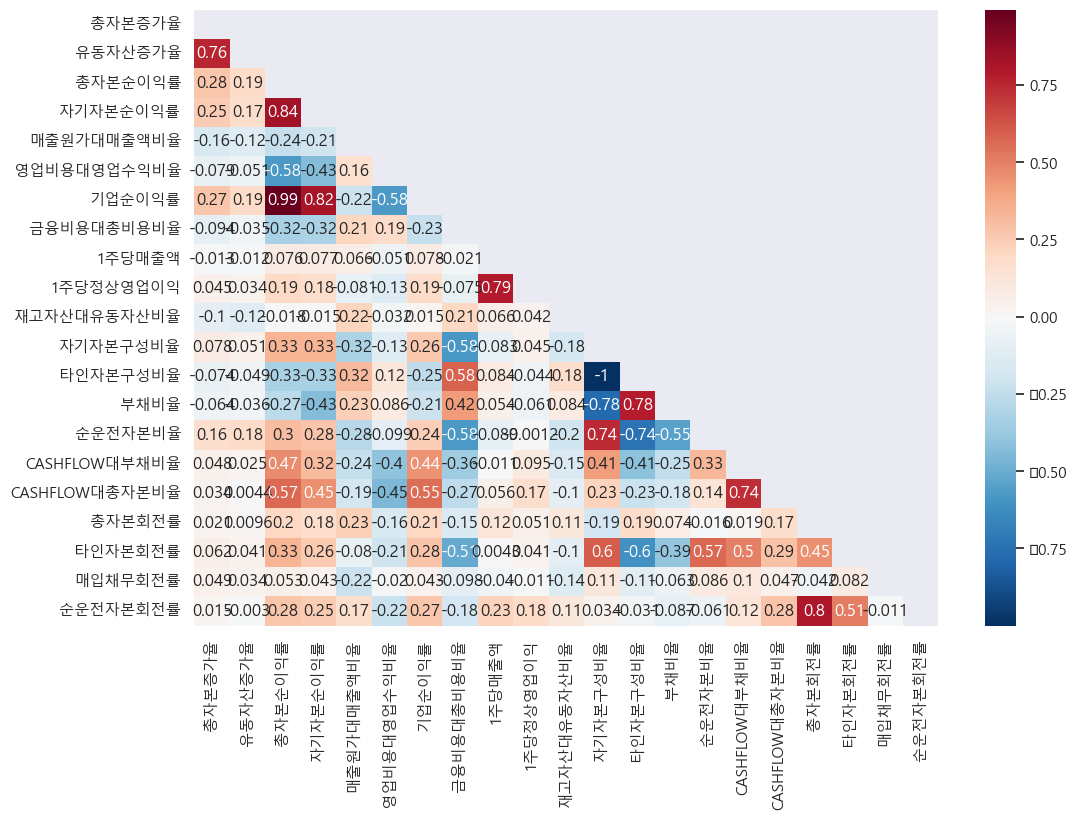

In [55]:
df_fs_cor = df_fs.corr(method='pearson')

sns.set(rc = {'figure.figsize':(12,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(df_fs_cor, xticklabels=df_fs_cor.columns, yticklabels=df_fs_cor.columns, cmap='RdBu_r', annot=True, mask=np.triu(df_fs_cor))

## 8. 중복 3번 Feature

In [56]:
# MDA_col
# Logit_col
# list_stepwise
# lasso_features
# list_kbest

list_MDA = list(MDA)
list_lr = list(Logit)
list_lasso = list(lasso)
list_kbest = list(kbest)
list_col_all = df_EDA.columns

In [57]:
def func_MDA(x):
    if x in list_MDA:
        return 1
    else:
        return 0
    
def func_lr(x):
    if x in list_lr:
        return 1
    else:
        return 0


def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [58]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['MDA'] = list_col_all.map(func_MDA)
feature_counts['Logit'] = list_col_all.map(func_lr)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)

feature_counts["total"] = feature_counts["MDA"]+feature_counts['Logit']+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 9


,Feature,MDA,Logit,lasso,kbest,total
0,총자본증가율,1,0,1,1,3
12,총자본순이익률,1,1,1,1,4
13,자기자본순이익률,1,0,1,1,3
14,매출원가대매출액비율,1,1,1,0,3
17,금융비용대총비용비율,1,0,1,1,3
28,자기자본구성비율,1,1,1,1,4
38,순운전자본비율,1,1,1,1,4
42,CASHFLOW대총자본비율,1,0,1,1,3
53,순운전자본회전률,1,0,1,1,3


In [59]:
feature_final['Feature'].to_list()

['총자본증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '금융비용대총비용비율',
 '자기자본구성비율',
 '순운전자본비율',
 'CASHFLOW대총자본비율',
 '순운전자본회전률']

In [60]:
df_fs = X_train_SS[['총자본증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '금융비용대총비용비율',
 '자기자본구성비율',
 '순운전자본비율',
 'CASHFLOW대총자본비율',
 '순운전자본회전률']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_fs.values, i) for i in range(df_fs.shape[1])]
vif["features"] = df_fs.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,4.1542775266,총자본순이익률
1,3.3915023812,자기자본순이익률
2,2.5963366464,순운전자본비율
3,2.5858281909,자기자본구성비율
4,1.7638722022,금융비용대총비용비율
5,1.5981246394,CASHFLOW대총자본비율
6,1.2683141098,순운전자본회전률
7,1.2435486804,매출원가대매출액비율
8,1.1410772272,총자본증가율


<AxesSubplot: title={'center': 'Correlation of Features'}>

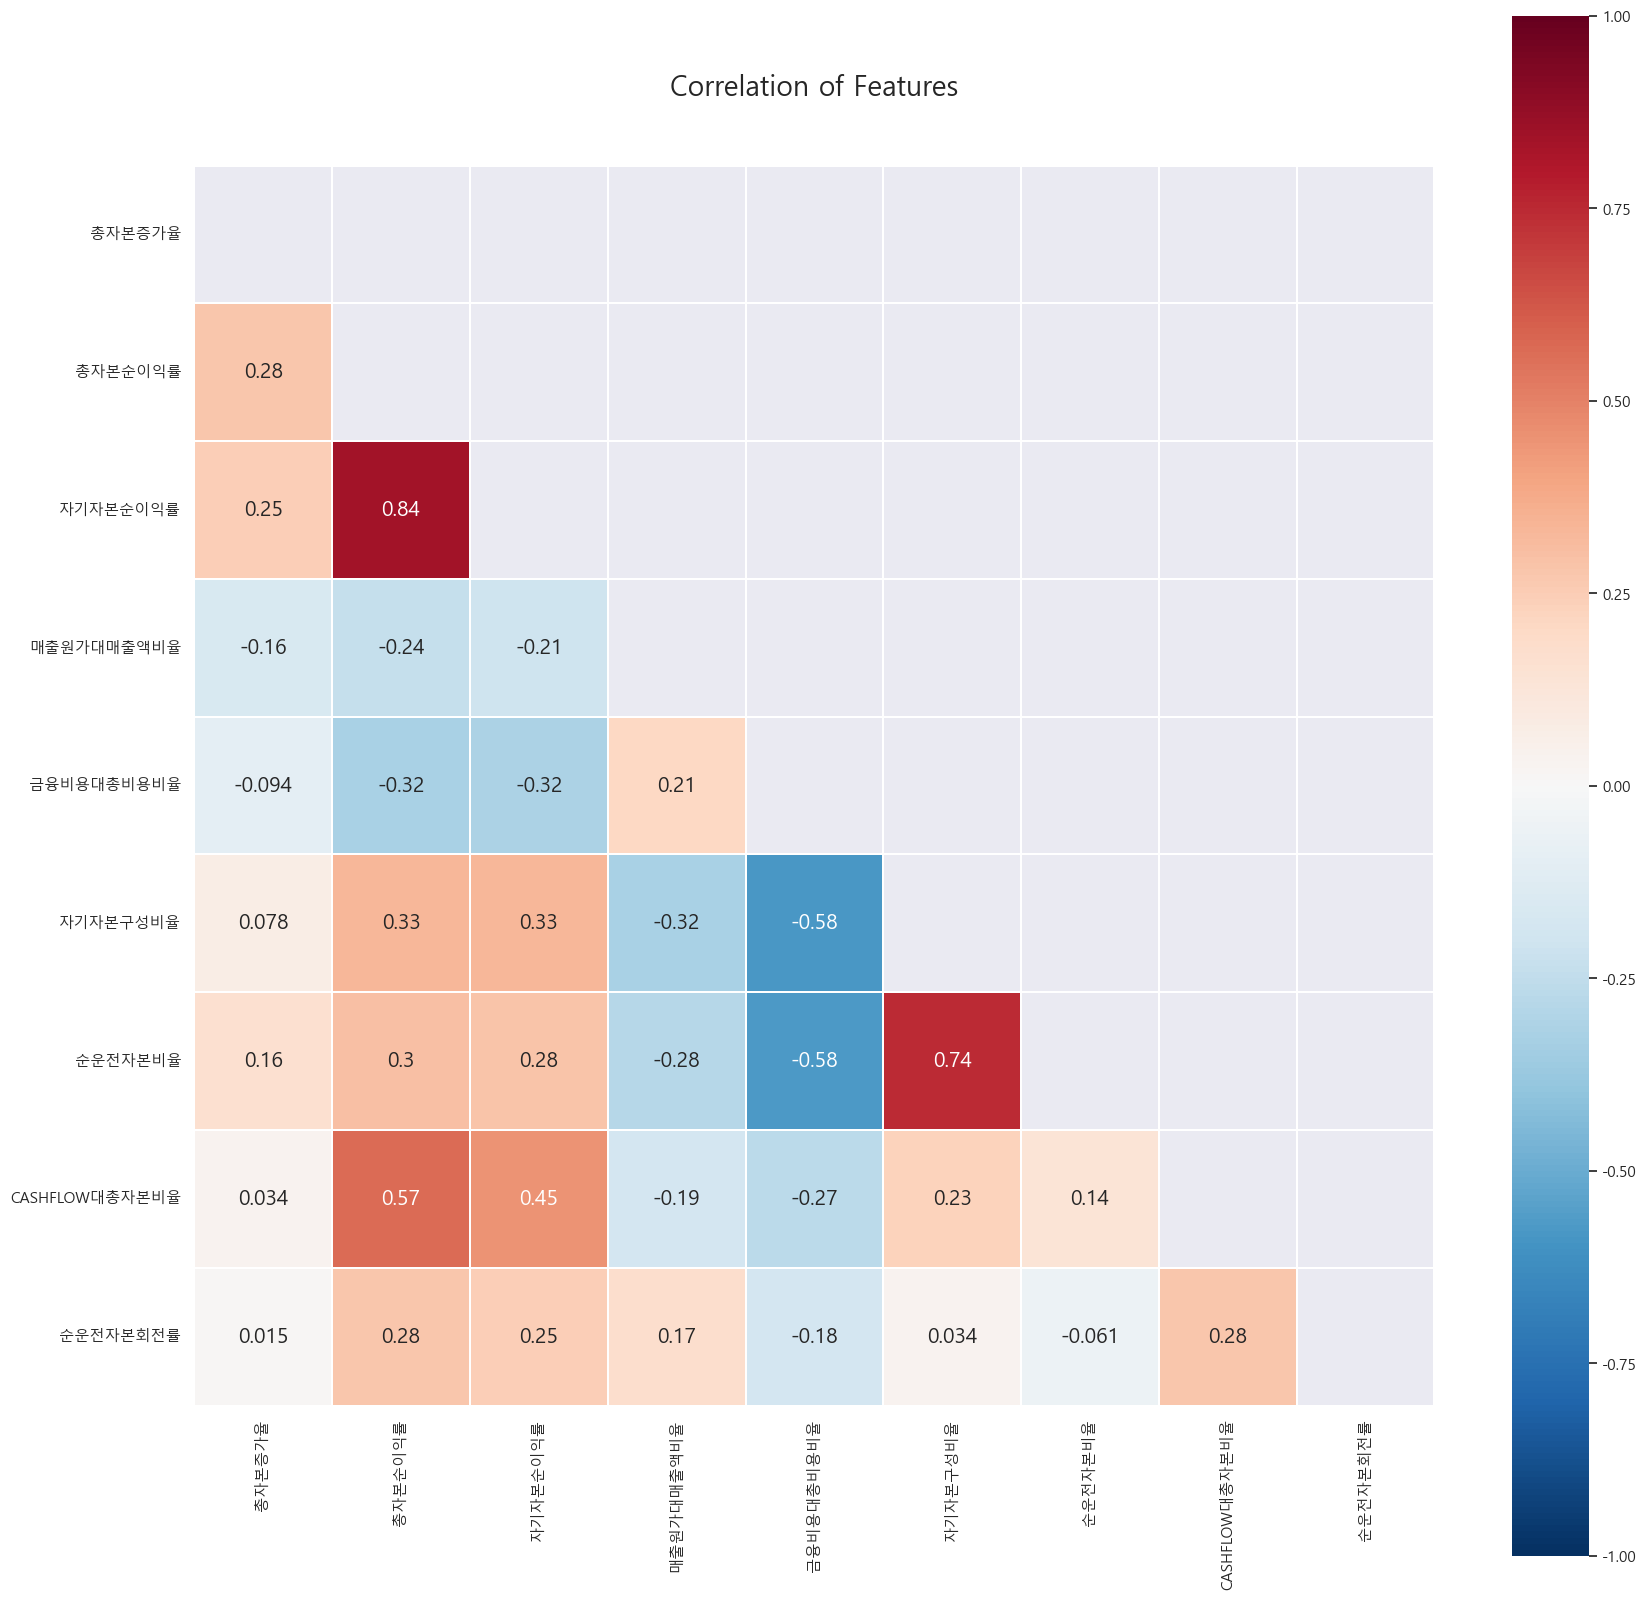

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = df_fs.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
plt.title("Correlation of Features", y = 1.05, size = 20)
sns.heatmap(df_fs.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
            vmin= -1.0 , square = True, cmap='RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 15})

# 코스피 + 코스닥 최종 피쳐
- '총자본증가율','총자본순이익률','자기자본순이익률','매출원가대매출액비율','금융비용대총비용비율','자기자본구성비율', '순운전자본비율','CASHFLOW대총자본비율','순운전자본회전률'

- 성장성 : 총자본증가율, 
- 수익성 : 총자본순이익률, 자기자본순이익률, 매출원가대매출액비율, 금융비용대총비용비율
- 안정성 : 자기자본구성비율, 순운전자본비율, CASHFLOW대총자본비율	
- 활동성 : 순운전자본회전률